### Driverless AI - How to display Reason codes/Feature importance with original text terms in MLI

#### Basic Steps
1. Create a NLP binary classification model in Driverless AI with text data (example Kaggle's Amazon Fine Food Reviews) - more the data the better for MLI.
2. Predict on a test data set or the same data set and download the predictions from Driverless AI
3. Create a MLI ready data set by running notebook below
4. Follow the screenshots at the end of the notebook to upload the MLI data/create new MLI interpretation etc.,

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

data_set_csv = "AmazonFineFoodReviews-train-26k.csv"
predictions_csv = "amazon_train_preds.csv"

In [22]:
df = pd.read_csv(data_set_csv)
df.describe()
df.Description.replace("br","",inplace=True,regex=True)
df.Summary.replace("br","",inplace=True,regex=True)

df.shape

(26319, 11)

In [28]:
# min_df keeps only the terms that appear 80 times or more in the doc
# We also use 1-4 ngram combinations
# Play with these numbers to increase or decrease total columns going into data set
# There is no real column limitation for Driverless MLI step, so go for it

tfidf = TfidfVectorizer(stop_words='english', min_df=250,ngram_range=(1,3))

In [29]:
preds_df = pd.read_csv(predictions_csv)
preds_df.shape

(26319, 2)

In [30]:
response = tfidf.fit_transform(pd.concat([df.Description]))


In [31]:
feature_names = tfidf.get_feature_names()
features_df = pd.DataFrame(response.toarray(), columns = feature_names)


In [32]:
features_df.shape

(26319, 680)

In [35]:

df2 = pd.concat([df, features_df,preds_df],sort=False,axis=1)
df2.head().transpose()

,0,1,2,3,4
UserId,A12UO92HK8IFY1,A12UTFBYVPDD49,A17X91STB6652Z,A17X91STB6652Z,A17X91STB6652Z
ProductId,B005FH3XCA,B003FDG4K4,B00020HHM2,B00073IVAQ,B00073JVFU
Id,142228,404031,293865,178249,386242
Summary,Crazy for this cracker!,Drinks were chalky at bottom,"Hetrbal Teas,Chamomile","Hetrbal Teas,Chamomile","Hetrbal Teas,Chamomile"
Score,5,2,5,5,5
HelpfulnessDenominator,1,10,0,0,0
ProfileName,Gfree Stacey,Paul Shelton,Michael E. Califfsr,Michael E. Califfsr,Michael E. Califfsr
HelpfulnessNumerator,1,5,0,0,0
Time,2011-08-31 17:00:00,2011-08-31 17:00:00,2011-08-31 17:00:00,2011-08-31 17:00:00,2011-08-31 17:00:00
Description,Great taste and it's good for you! I love whe...,These drinks have a chalky residue in bottom o...,This is an outstanding product!! The test is g...,This is an outstanding product!! The test is g...,This is an outstanding product!! The test is g...


In [34]:

df2.to_csv("amazon_mli_ready.csv")

# Make sure you upload it to Driverless AI Data Sets Page

### Go to MLI Screen and Click on "New Interpretation". Choose this data set
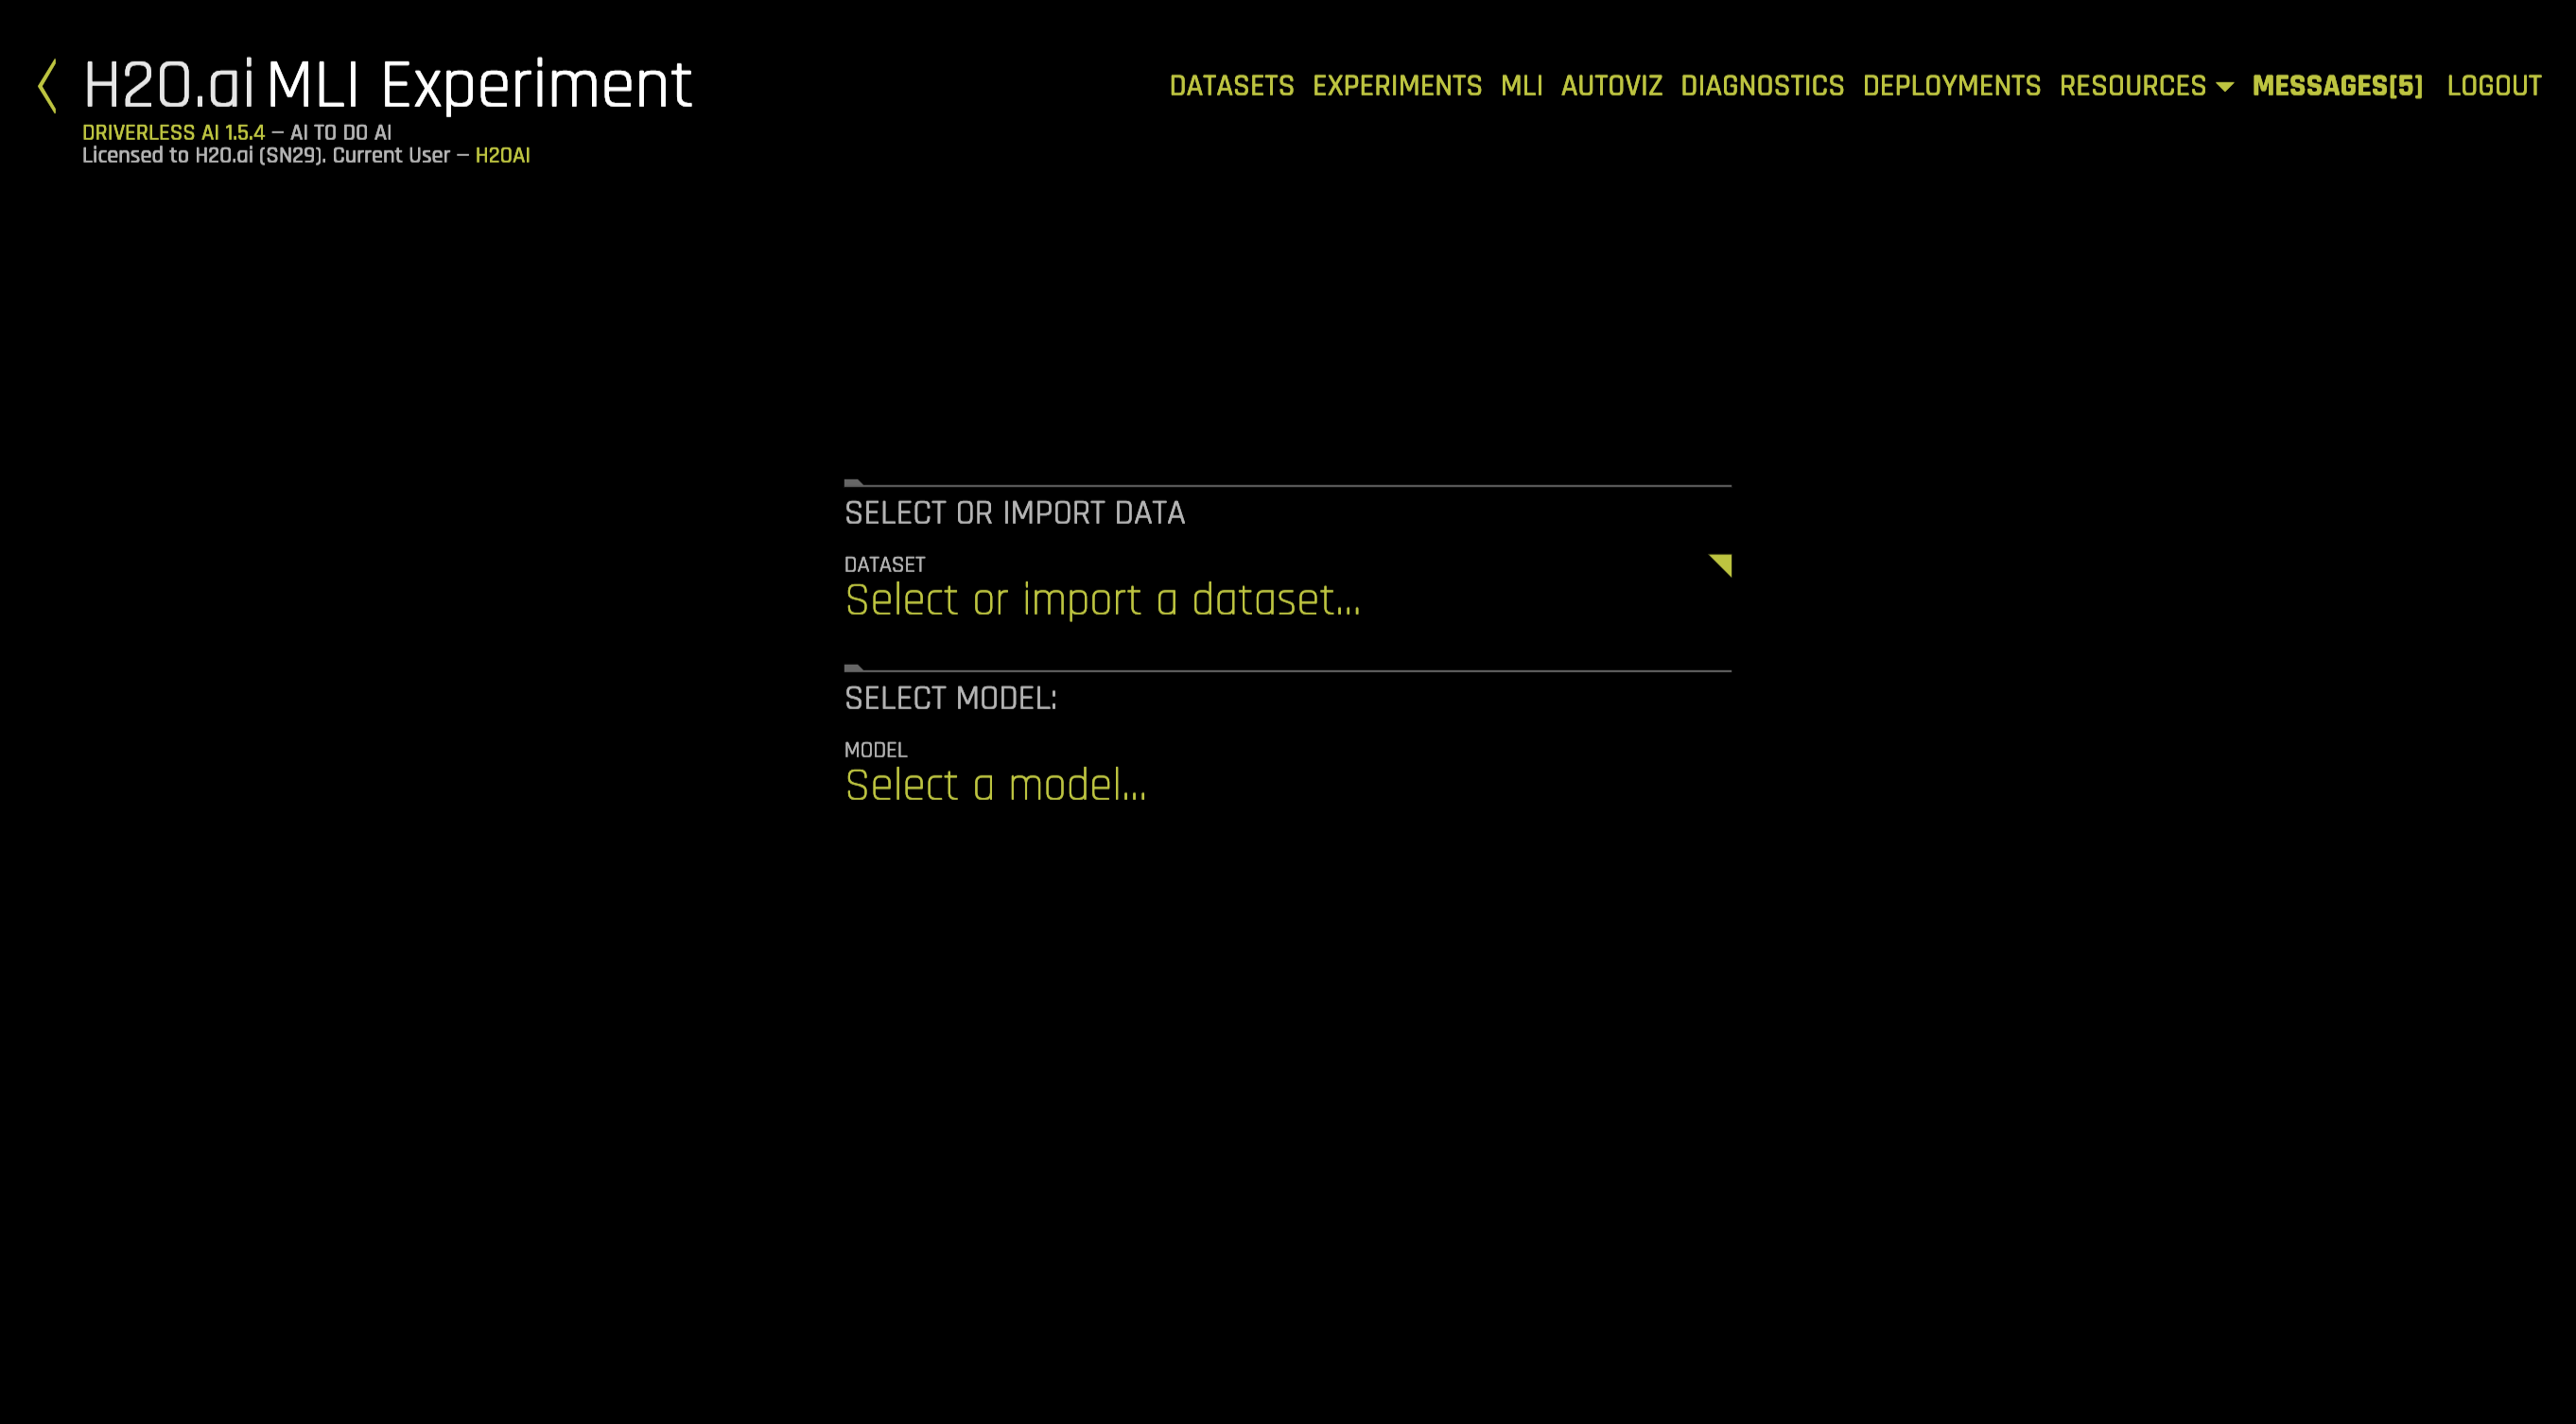

### Choose Original Target Column and Prediction Column. Also Choose "LIME-SUP" for Lime Method. Click "Launch MLI"
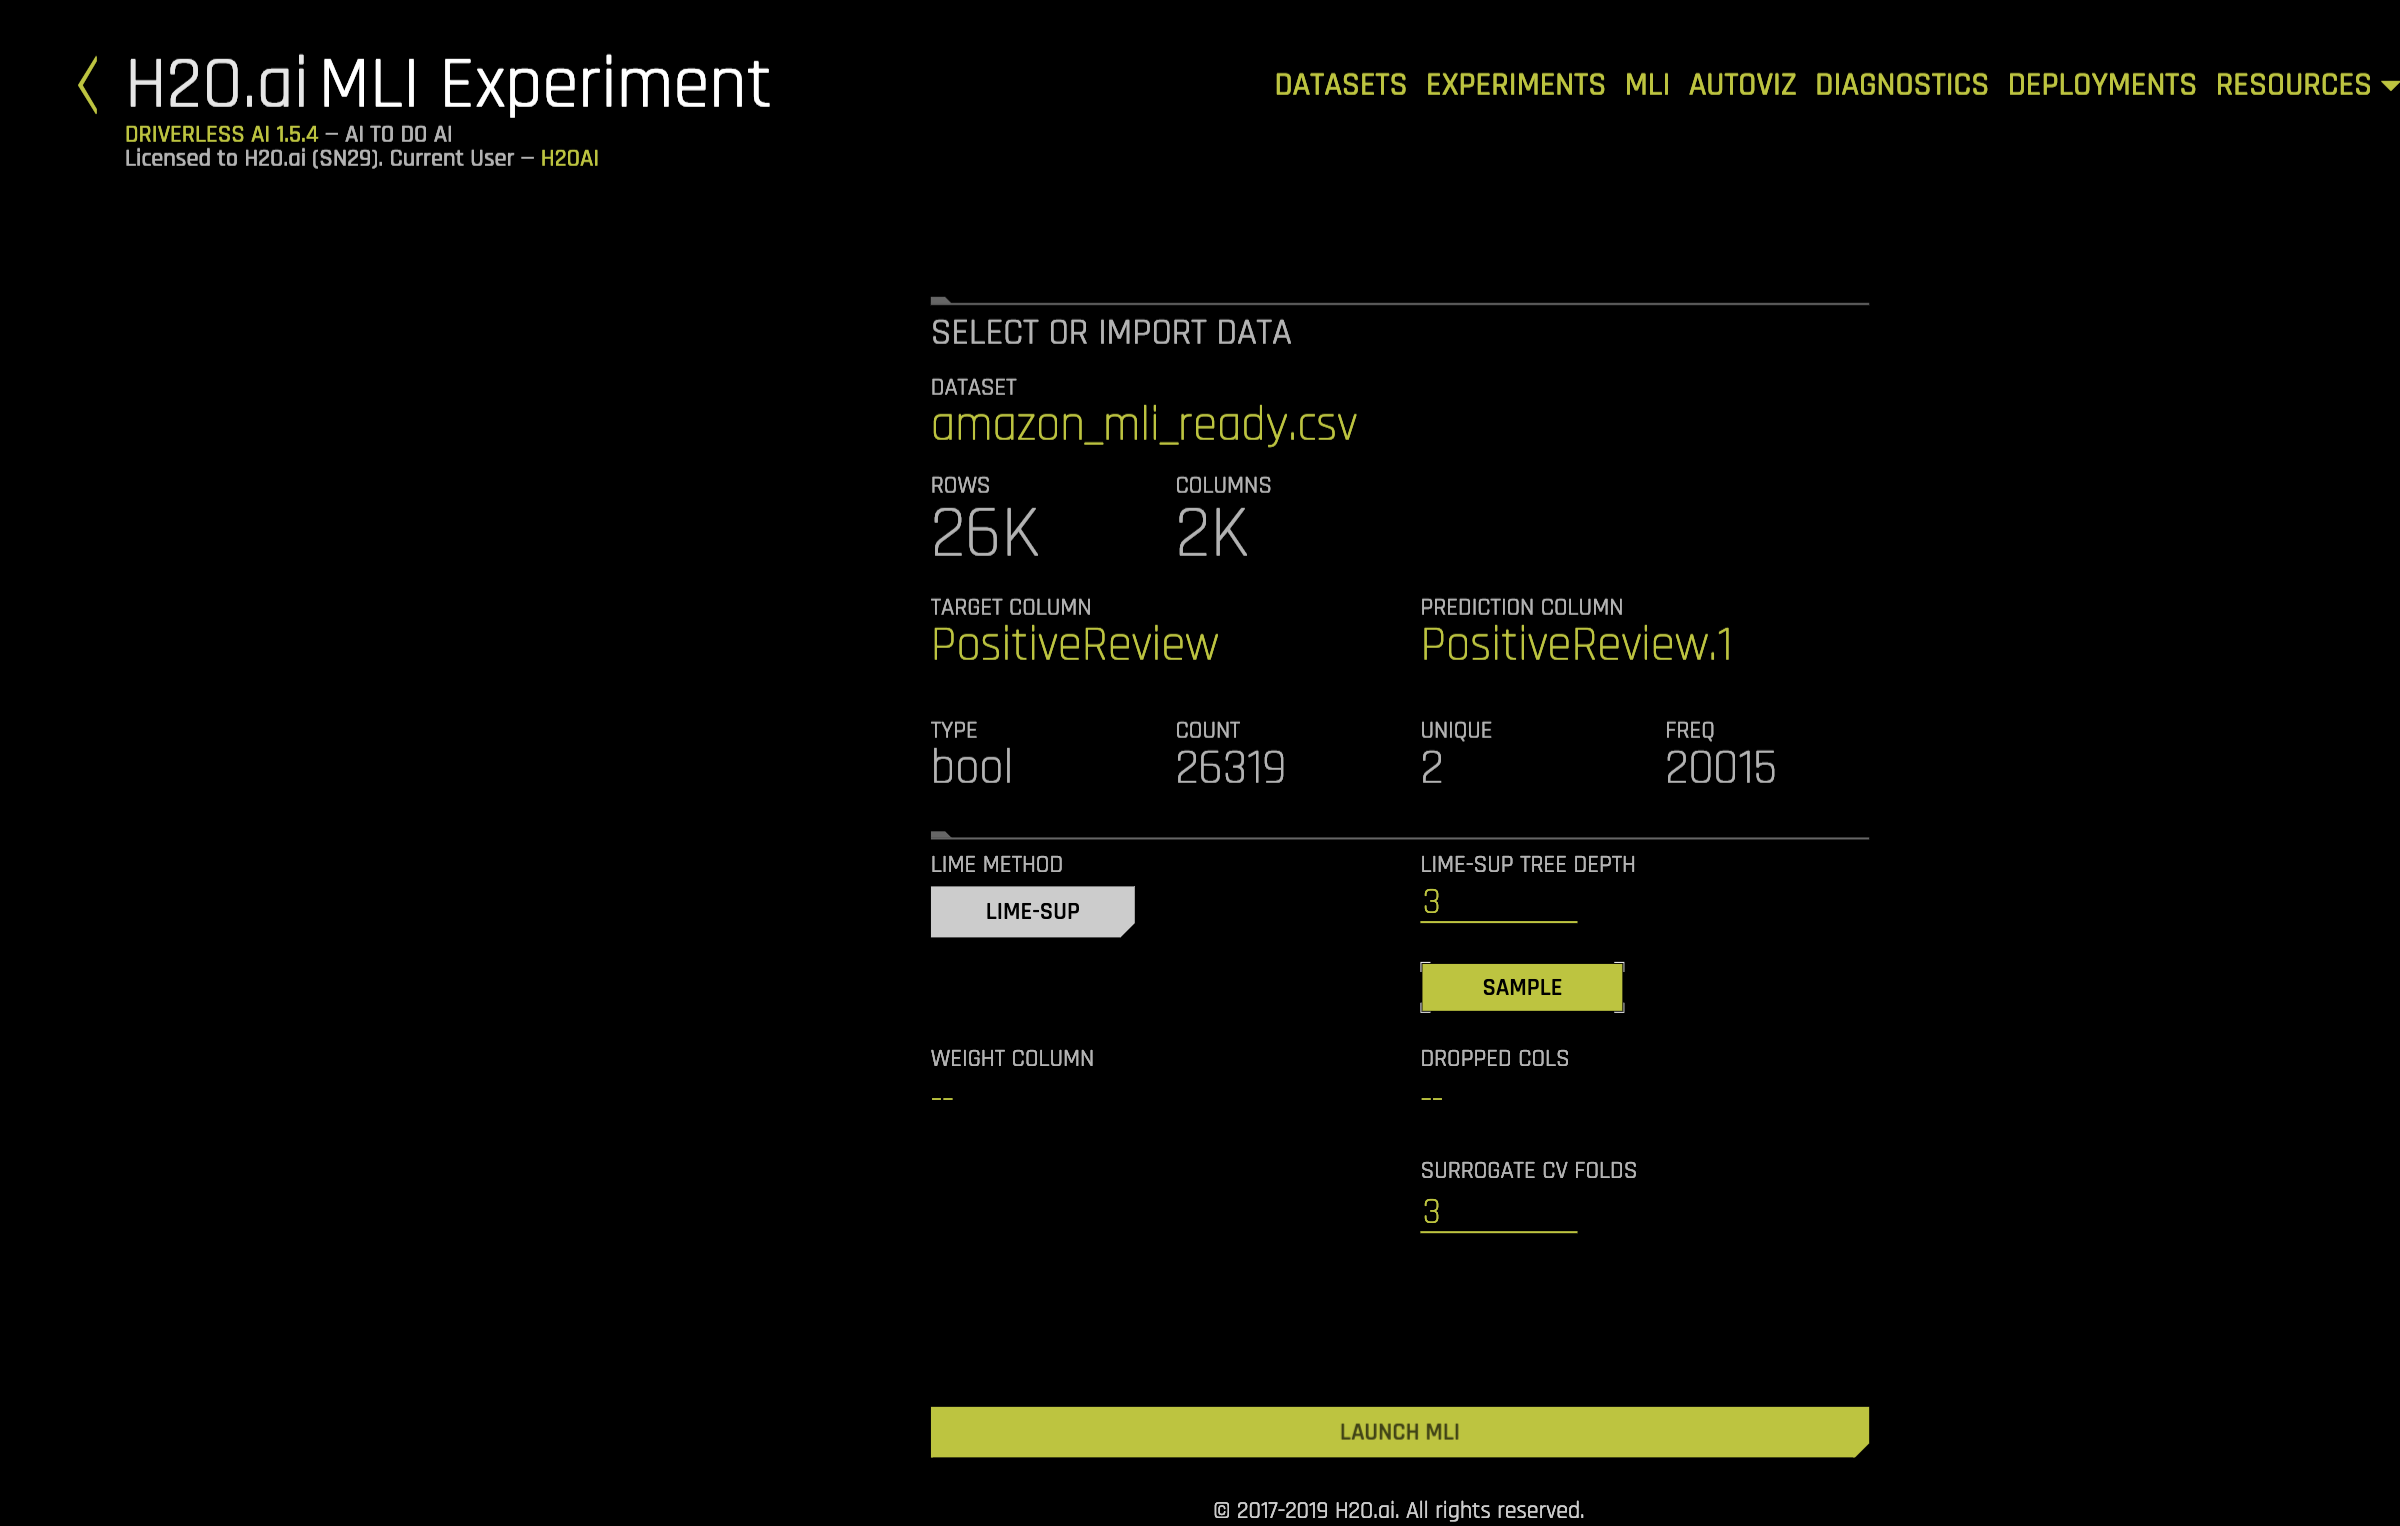

### Choose "Dropped Cols" and drop all the original columns including the negative Prediction Column (Positive Review.0). Click "Launch MLI"
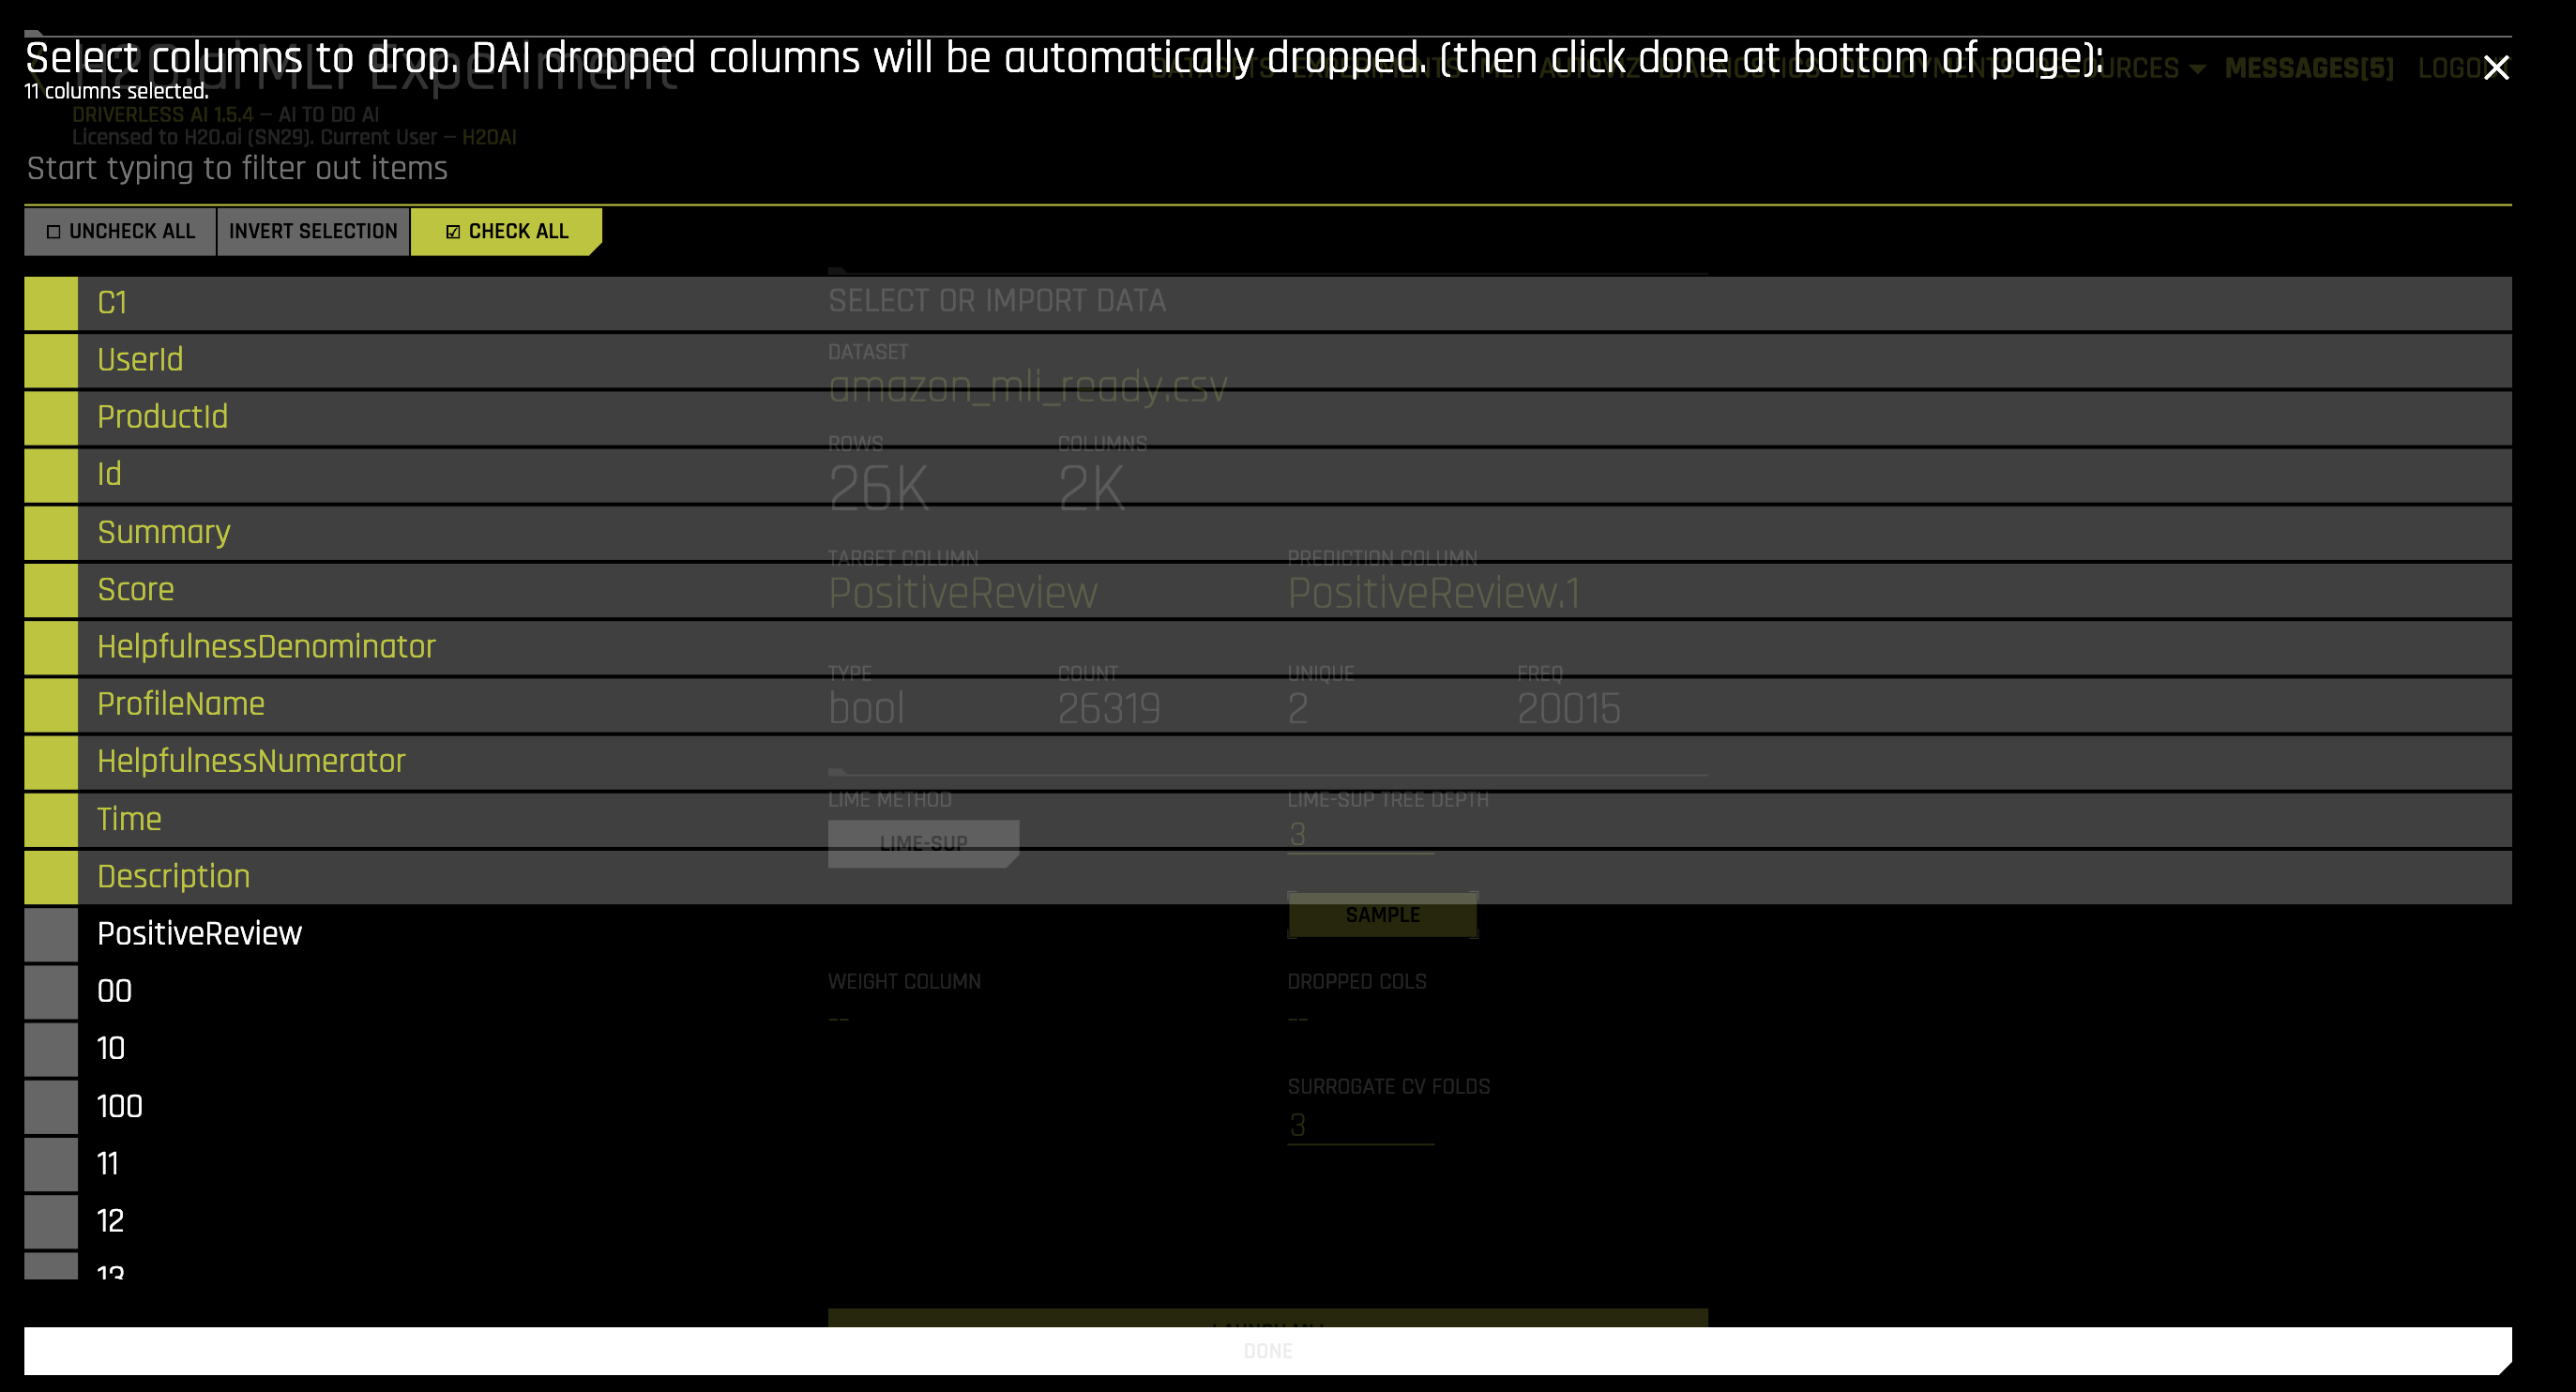
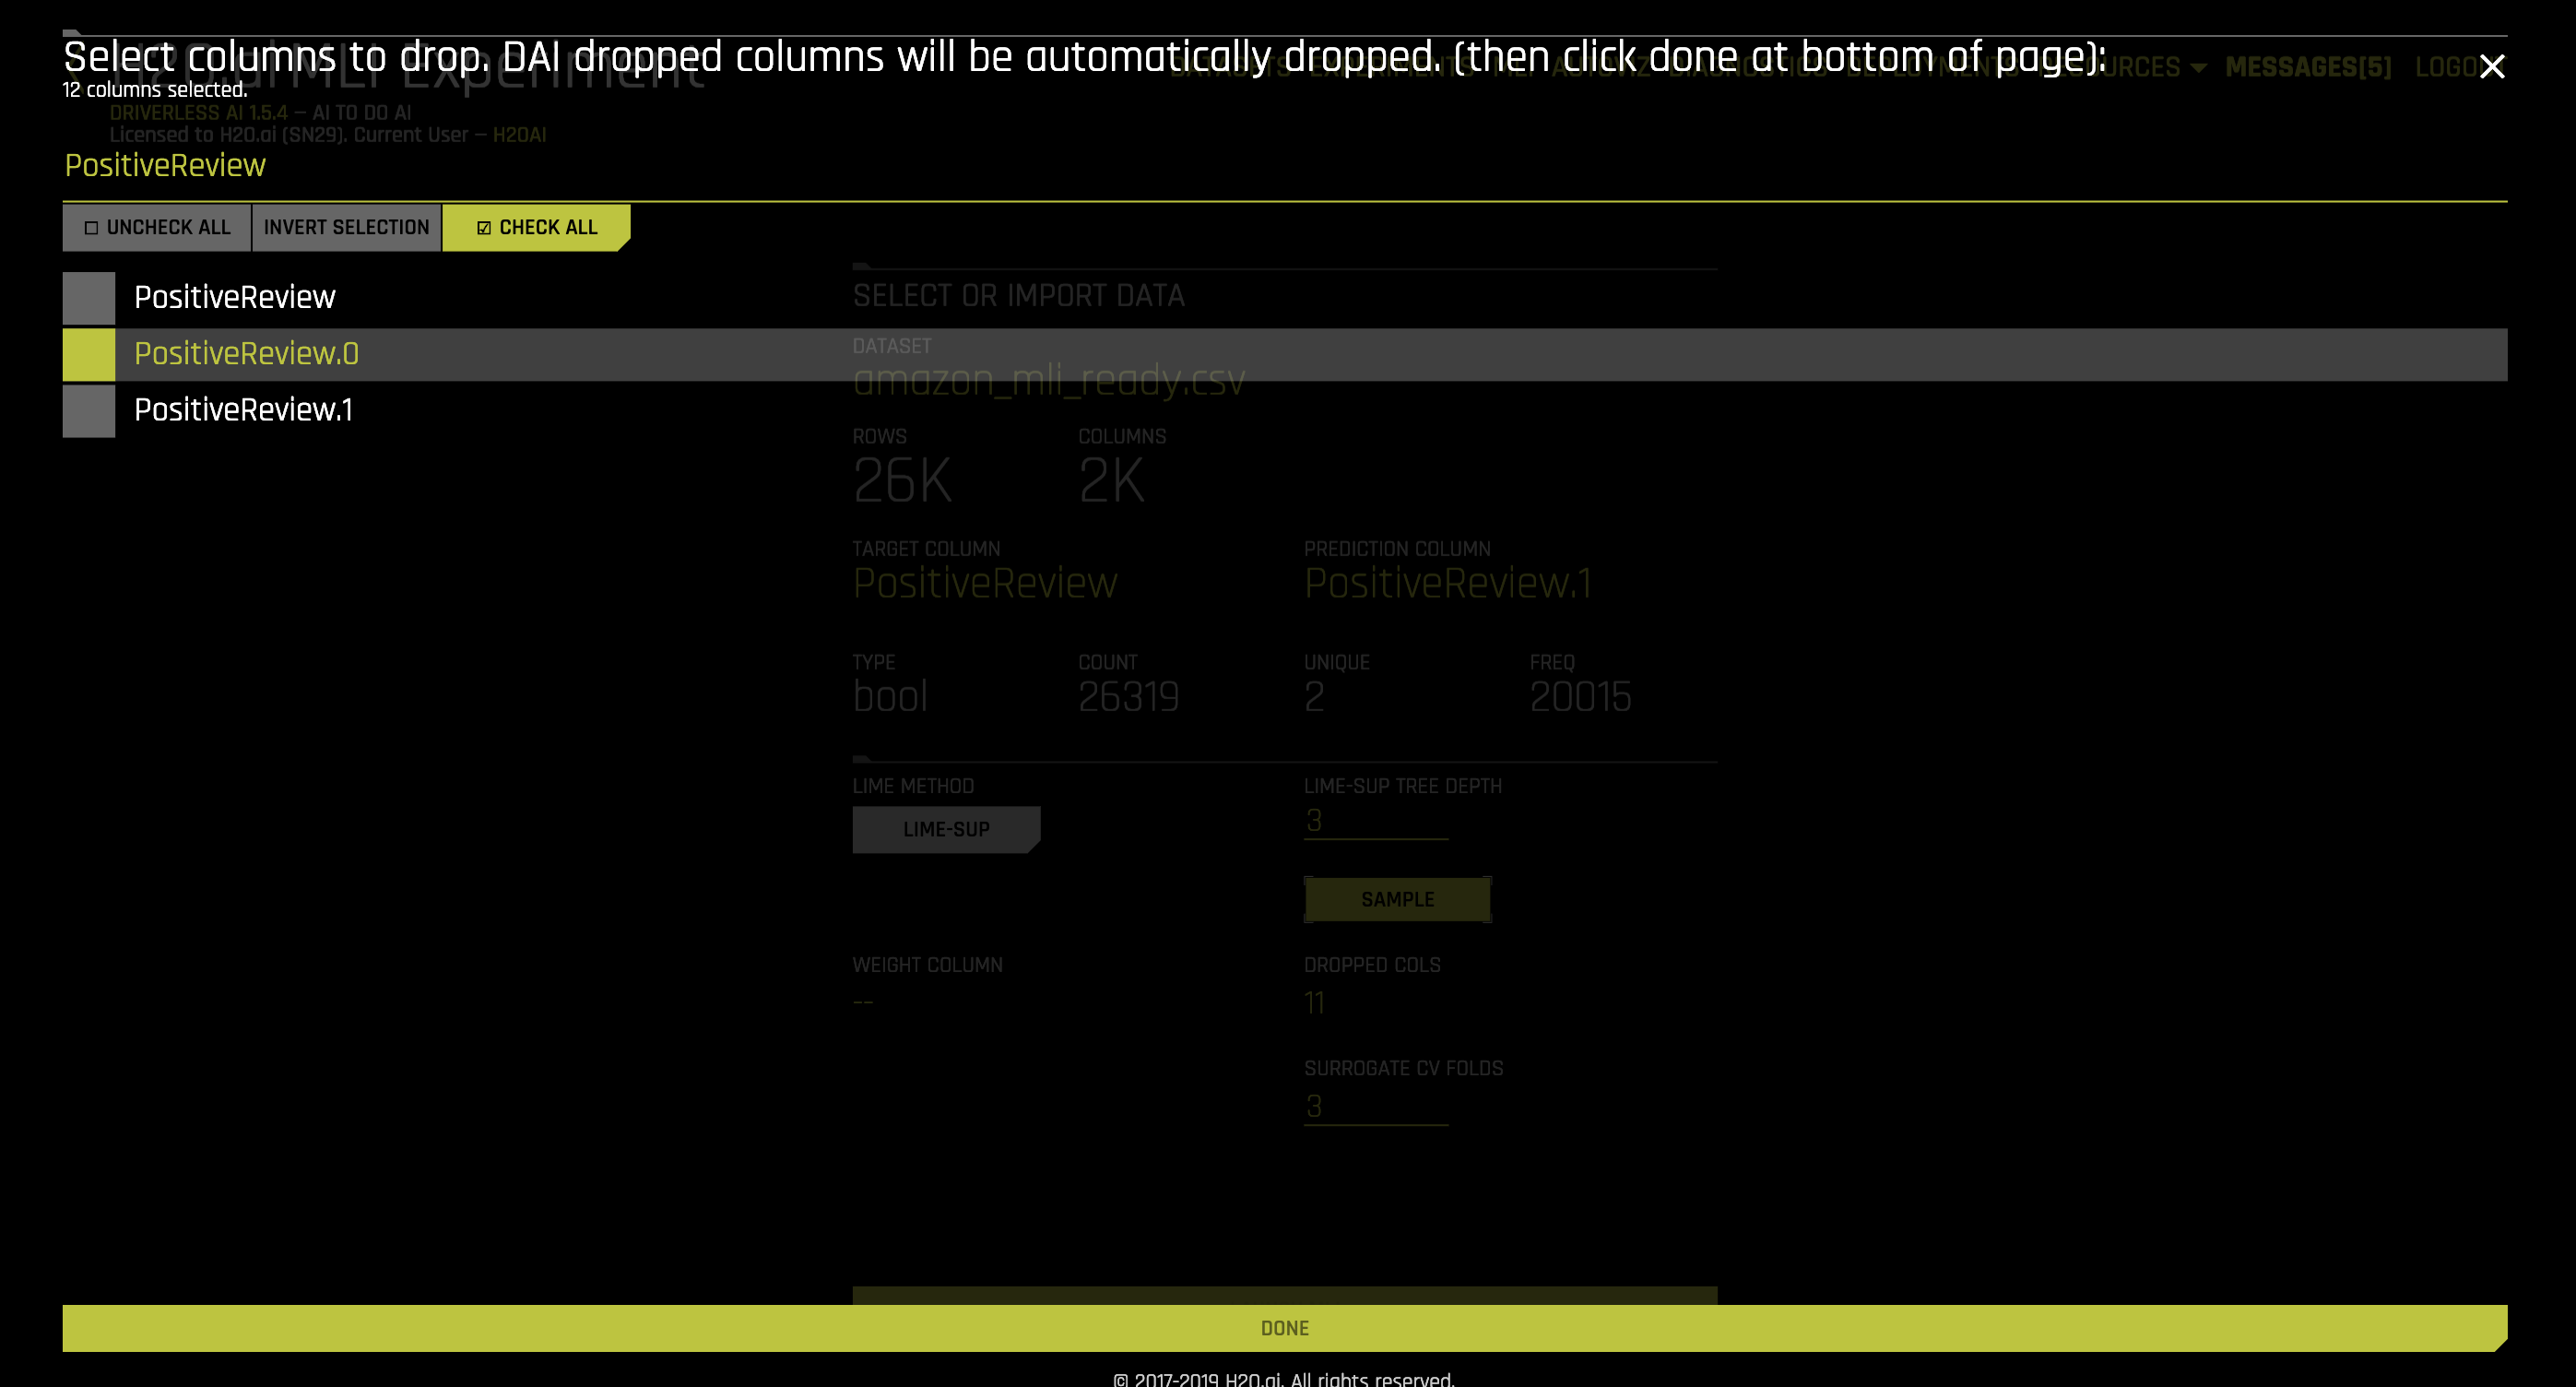
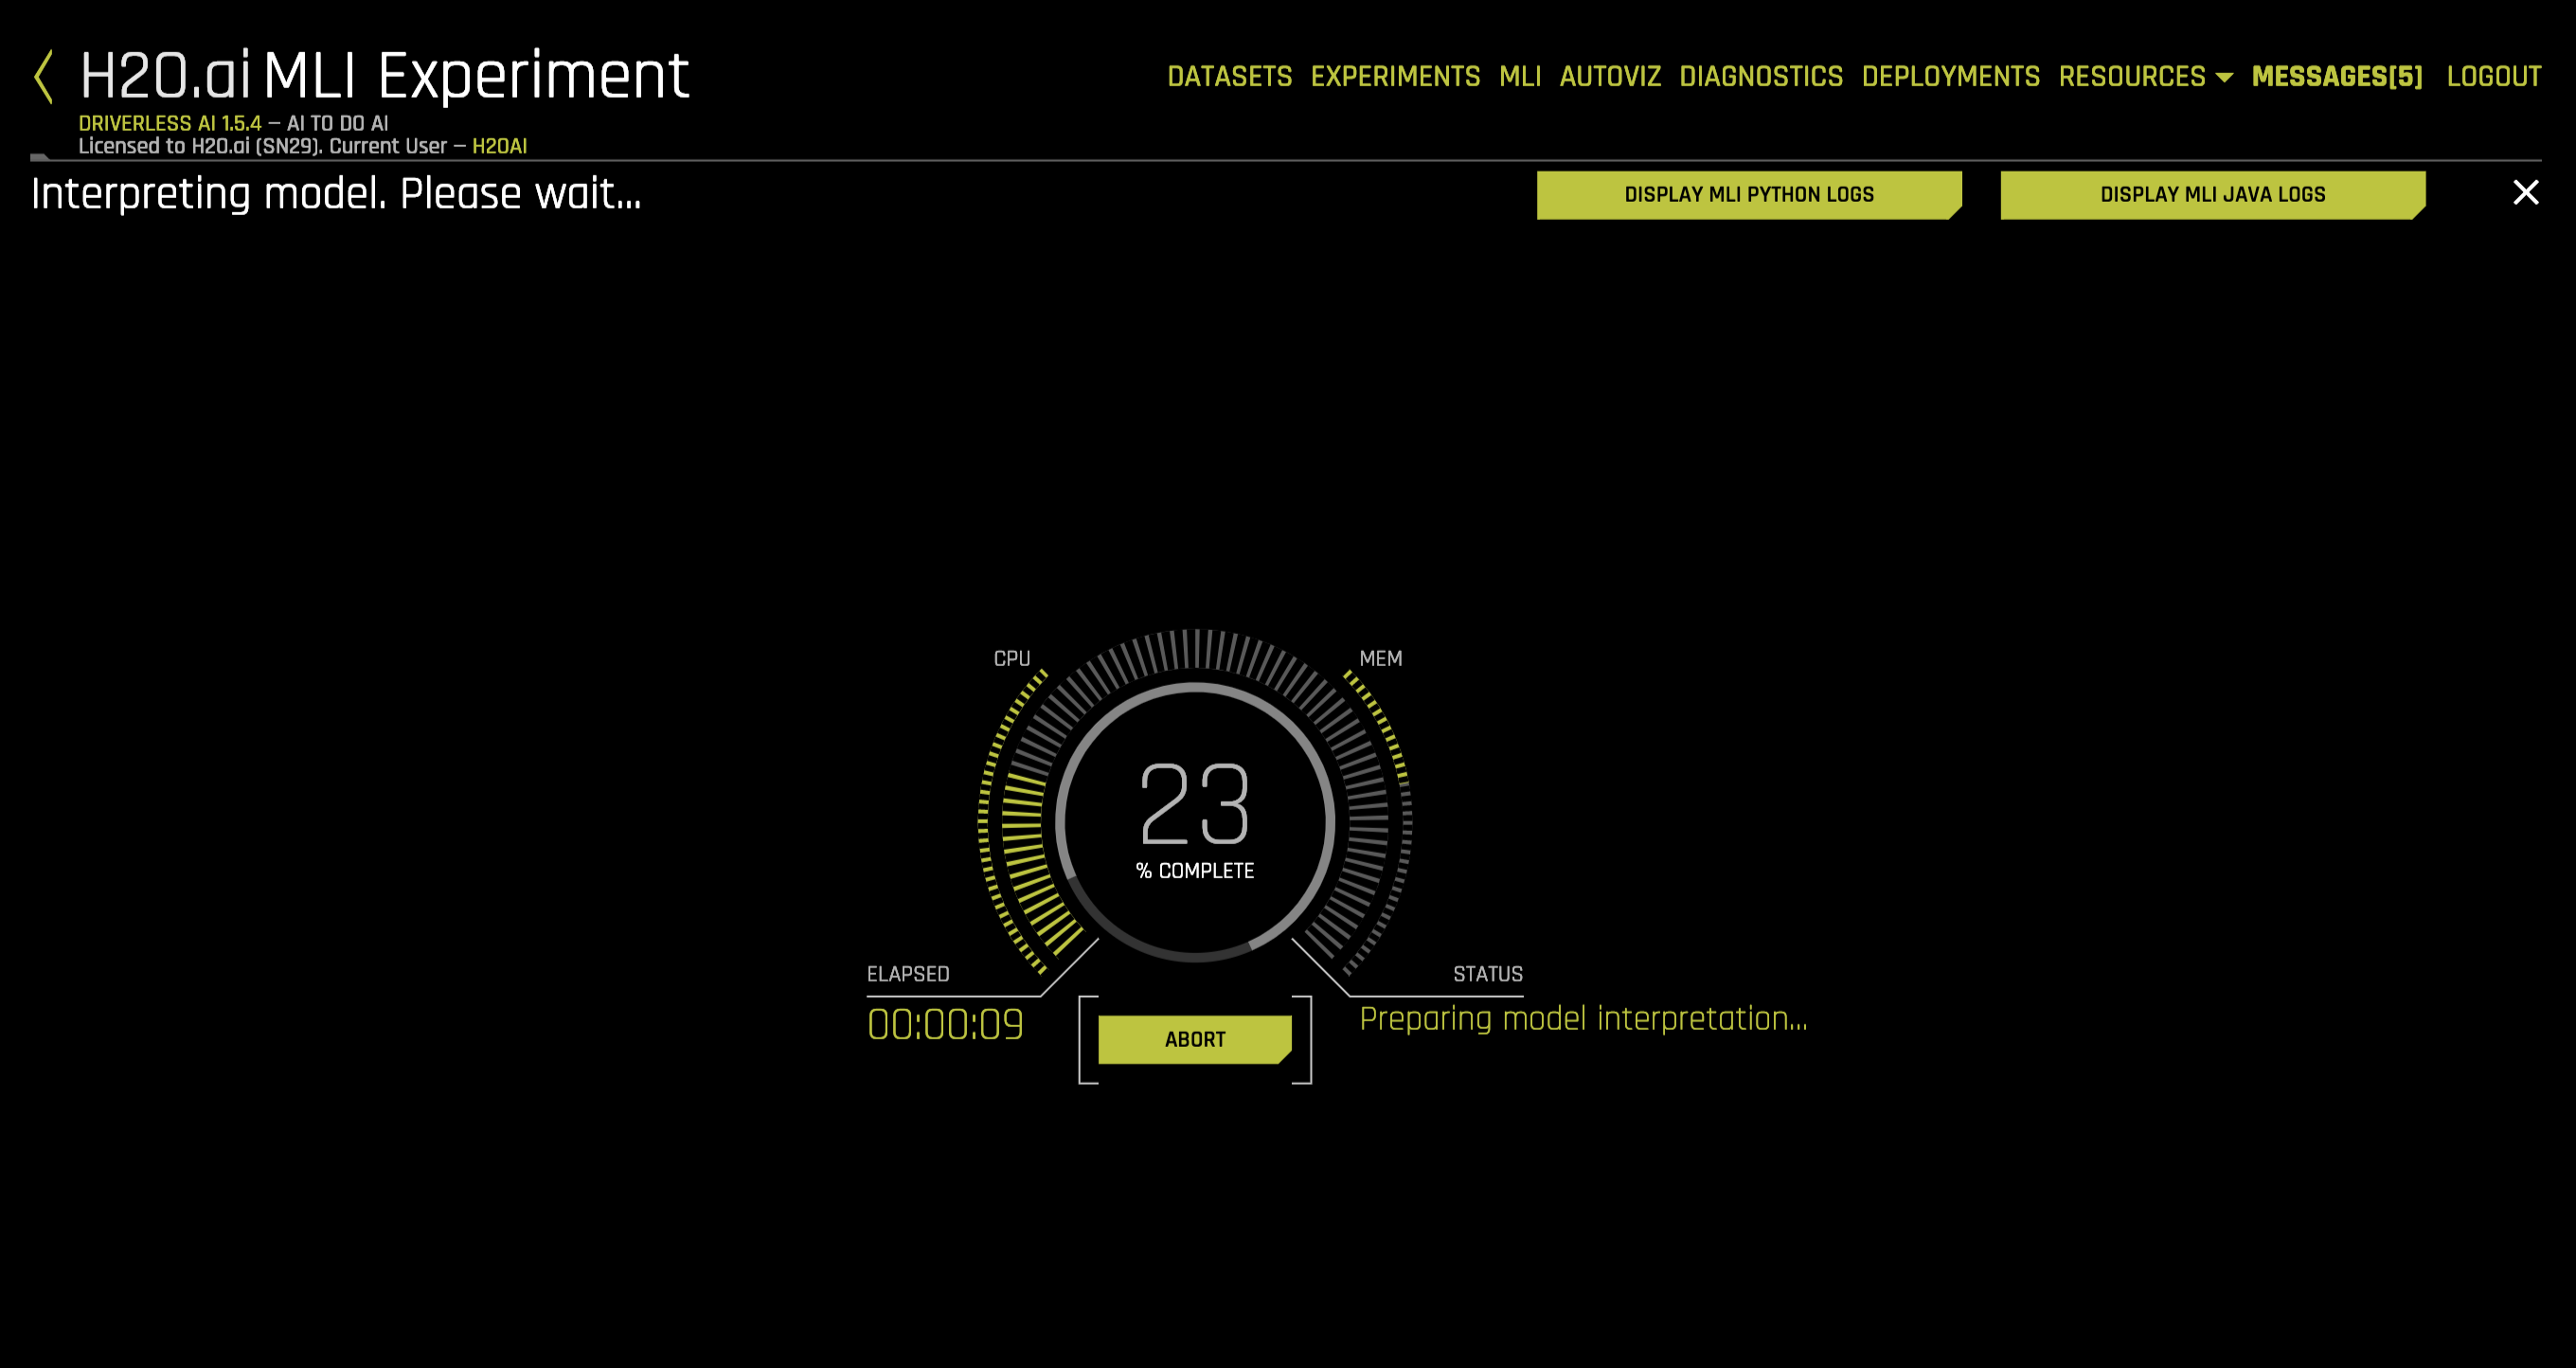

### That's it. Now you can interpret the model with text terms as Reason Codes/Feature Importance

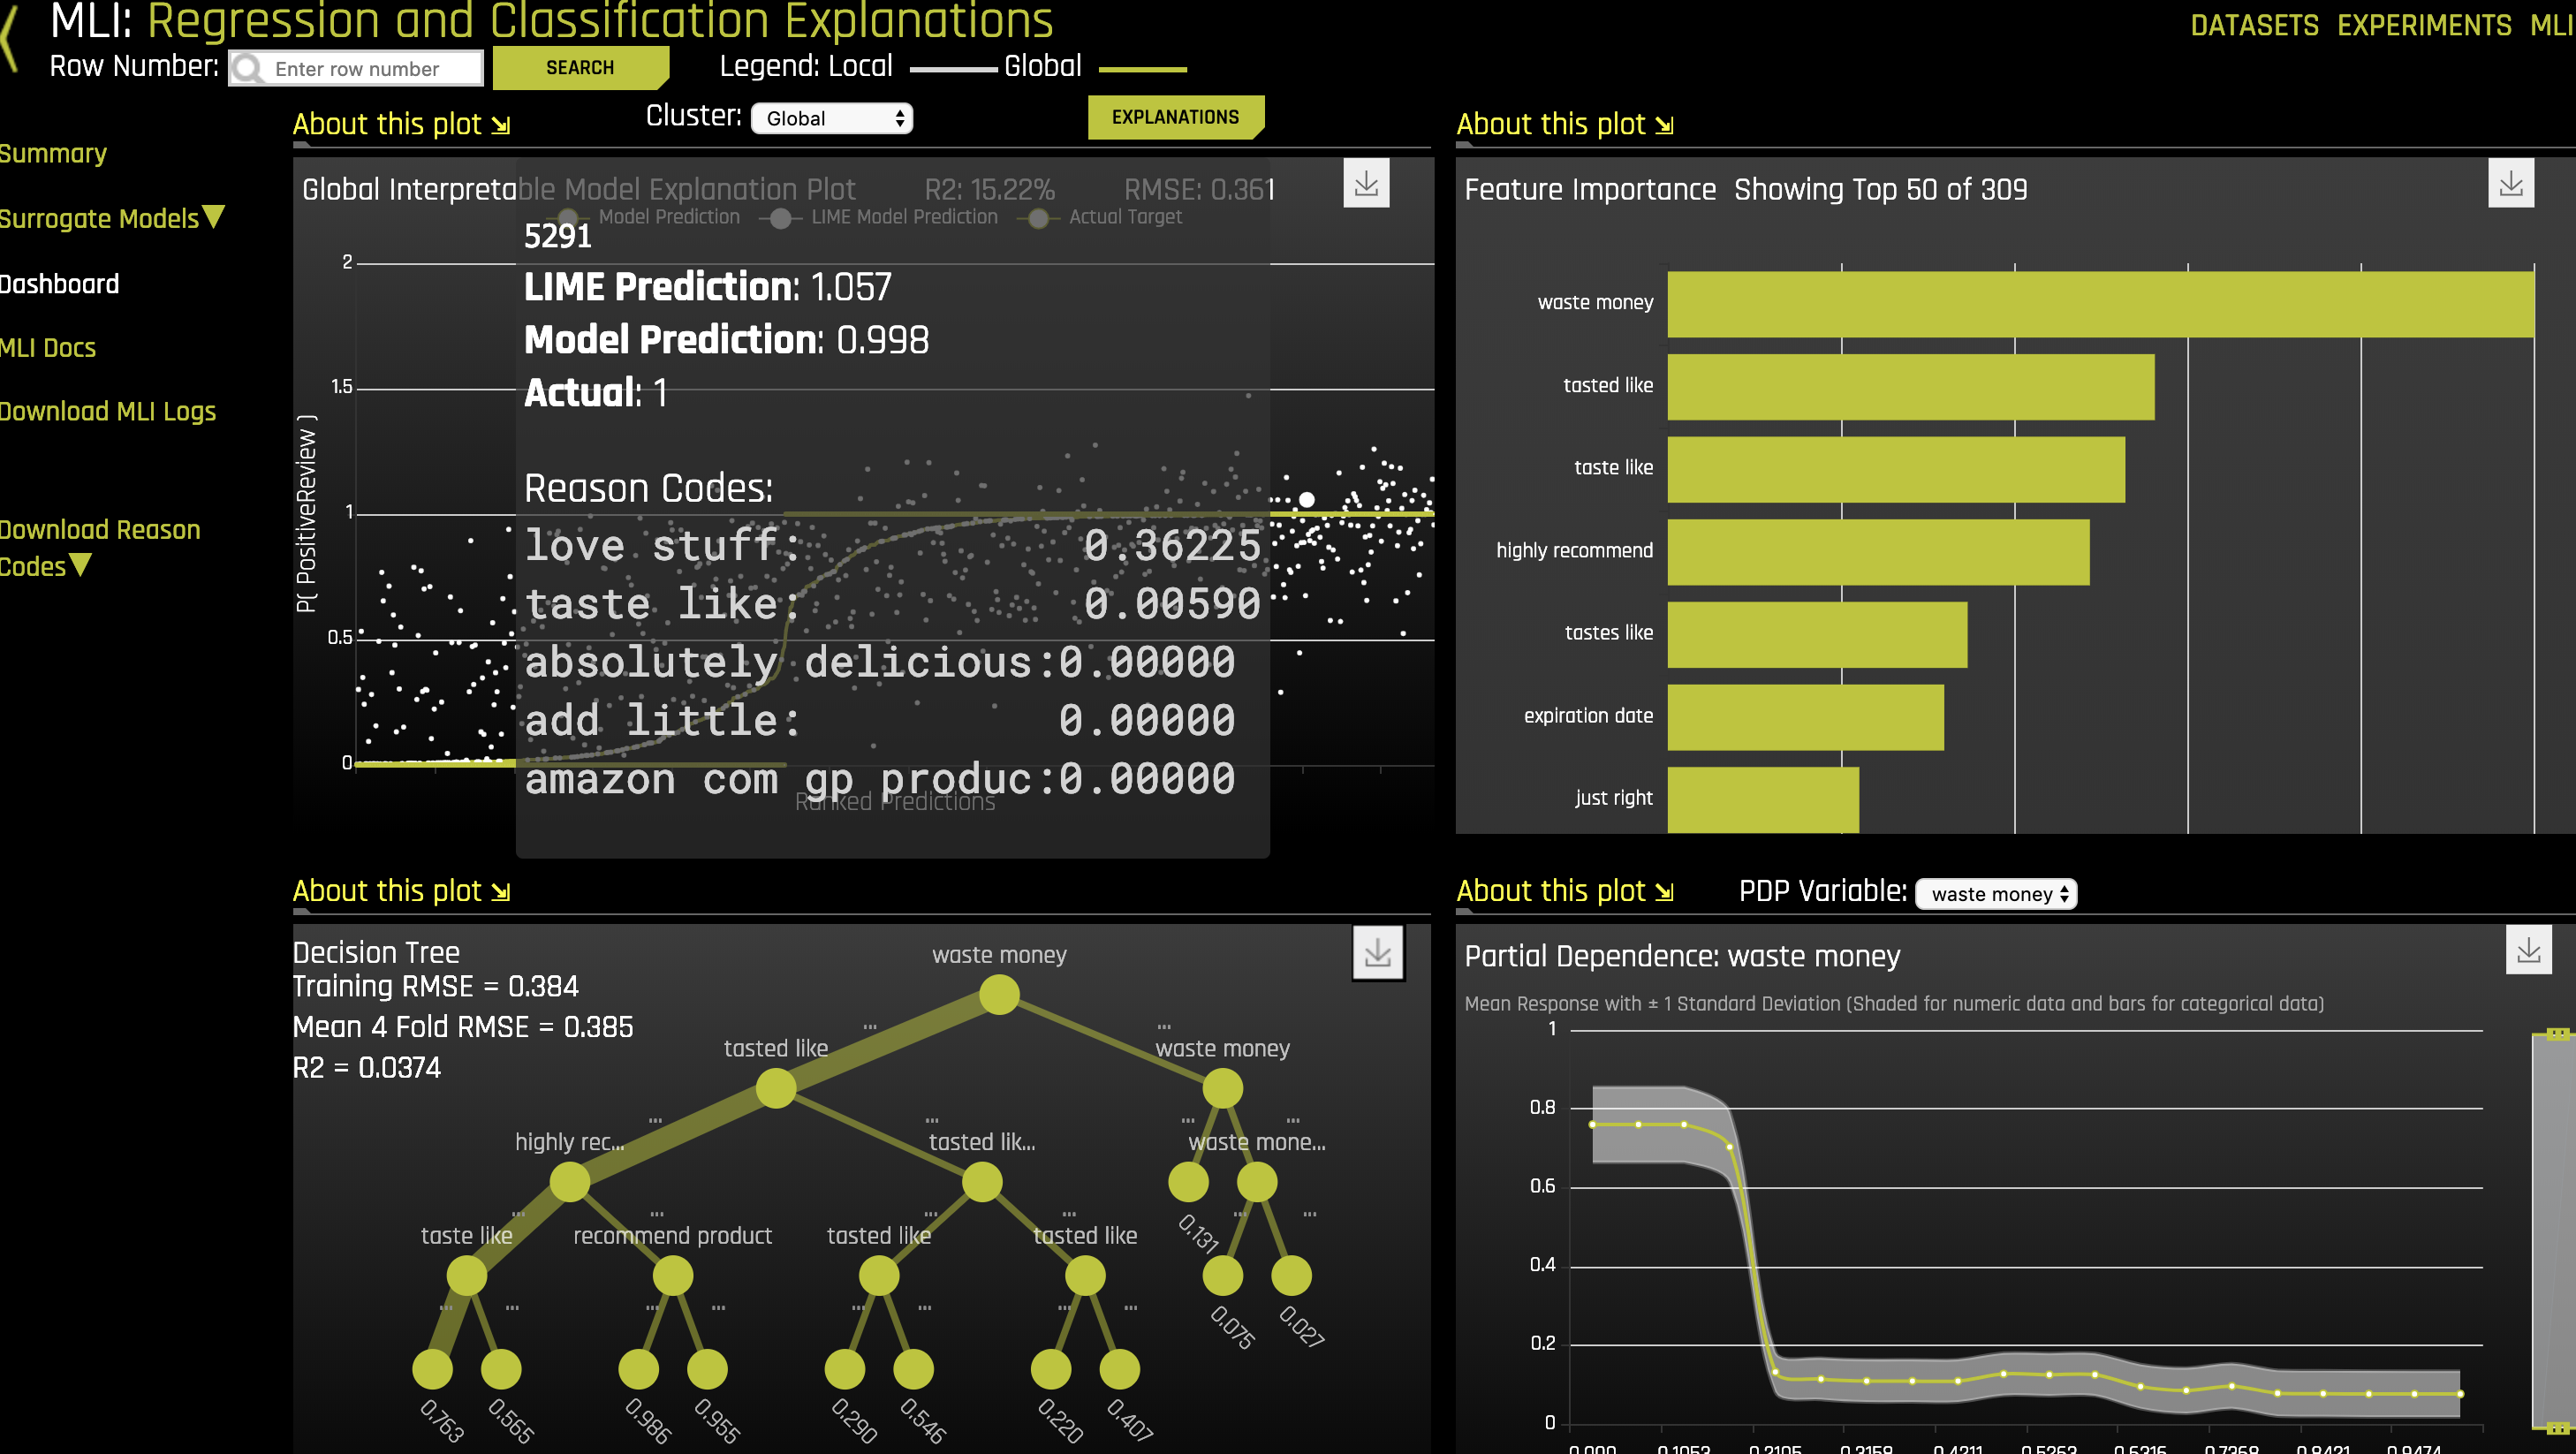 